In [334]:
import pandas
import matplotlib.pyplot as plt
import torch
import torch.utils.data
from  torch.utils.data import DataLoader as  dataloader
import sklearn as skl
import sklearn.preprocessing as ppr

In [335]:
import pandas as pd
import random

In [336]:
import numpy as np

In [337]:
pokemon = pandas.read_csv( "/home/sanchit/Desktop/starting_ML/pokemon_data.csv")

In [338]:
pokemon.head()


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [339]:
pokemon_names = pokemon["Name"].copy()

In [340]:
pokemon.drop(["Name", "#"],1, inplace = True) #removing unwanted columns

In [341]:
pokemon.corr()["Legendary"].sort_values(ascending = False)


Legendary     1.000000
Sp. Atk       0.448907
Sp. Def       0.363937
Attack        0.345408
Speed         0.326715
HP            0.273620
Defense       0.246377
Generation    0.079794
Name: Legendary, dtype: float64

##### since we can see a strong correlation in sp. attack as well as with attack 
##### we will add both to get a new predictor that is sum of 2


In [342]:
pokemon["total_attack"] = pokemon["Sp. Atk"] + pokemon["Attack"]

In [343]:
pokemon.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_attack
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,0.469450
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,0.834101
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,0.395752
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,0.837037
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,0.461416
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,0.511403
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794,0.052555
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000,0.475562
total_attack,0.469450,0.834101,0.395752,0.837037,0.461416,0.511403,0.052555,0.475562,1.000000


###### so now  we drop sp. Atk and Attack rows in our data

In [344]:
pokemon.drop(["Sp. Atk", "Attack"], 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcf5ec0c88>,
      dtype=object)

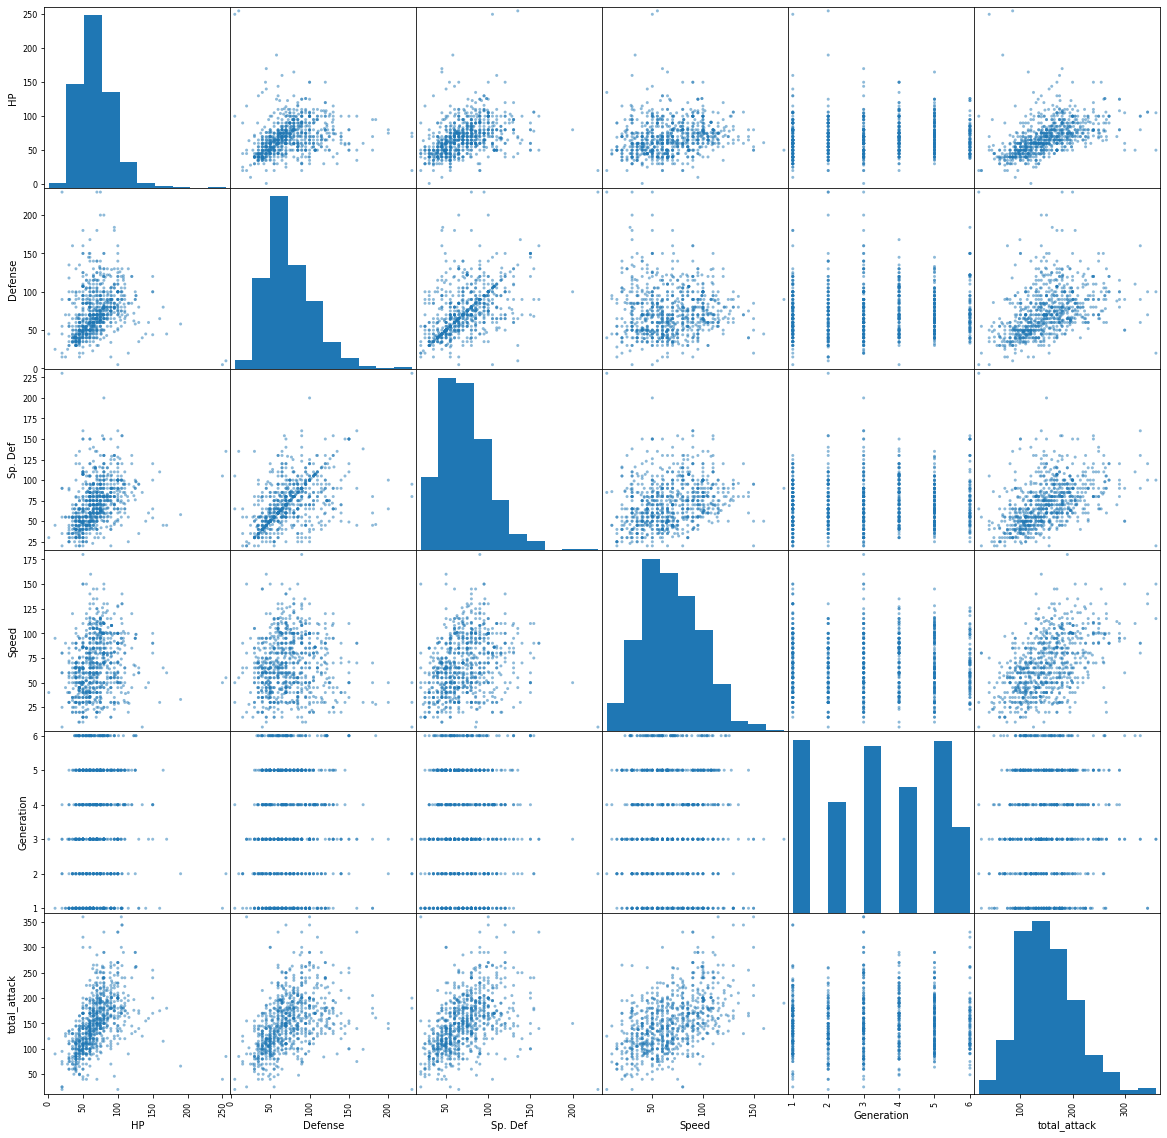

In [345]:
#checking linearity

pandas.plotting.scatter_matrix(pokemon.drop("Legendary", 1), figsize = (20,20))

###### sp. def and defence have certain relation 

In [346]:
# adding to get total defence

In [347]:
pokemon["total defence"] = pokemon["Sp. Def"] + pokemon["Defense"]

In [348]:
pokemon.drop(["Sp. Def", "Defense"],1,inplace =True )

In [349]:
pokemon.head()

,Type 1,Type 2,HP,Speed,Generation,Legendary,total_attack,total defence
0,Grass,Poison,45,45,1,False,114,114
1,Grass,Poison,60,60,1,False,142,143
2,Grass,Poison,80,80,1,False,182,183
3,Grass,Poison,80,80,1,False,222,243
4,Fire,NaN,39,65,1,False,112,93


In [350]:
#replacing type 1 and type 2 with label encoder
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
Type 1           800 non-null object
Type 2           414 non-null object
HP               800 non-null int64
Speed            800 non-null int64
Generation       800 non-null int64
Legendary        800 non-null bool
total_attack     800 non-null int64
total defence    800 non-null int64
dtypes: bool(1), int64(5), object(2)
memory usage: 44.6+ KB


In [351]:
print(pokemon["Type 2"].unique().__len__())
pokemon["Type 1"]

19


0         Grass
1         Grass
2         Grass
3         Grass
4          Fire
5          Fire
6          Fire
7          Fire
8          Fire
9         Water
10        Water
11        Water
12        Water
13          Bug
14          Bug
15          Bug
16          Bug
17          Bug
18          Bug
19          Bug
20       Normal
21       Normal
22       Normal
23       Normal
24       Normal
25       Normal
26       Normal
27       Normal
28       Poison
29       Poison
         ...   
770       Fairy
771    Fighting
772    Electric
773        Rock
774      Dragon
775      Dragon
776      Dragon
777       Steel
778       Ghost
779       Ghost
780       Ghost
781       Ghost
782       Ghost
783       Ghost
784       Ghost
785       Ghost
786       Ghost
787       Ghost
788         Ice
789         Ice
790      Flying
791      Flying
792       Fairy
793        Dark
794      Dragon
795        Rock
796        Rock
797     Psychic
798     Psychic
799        Fire
Name: Type 1, Length: 80

In [352]:
#so we use label enoder to fit on type 2 data and use that fit to transfroms both type 2 and type 1

x = ppr.LabelEncoder()
x.fit_transform(pokemon[ "Type 2"])

#UNABLE TO REPLACE NAN

TypeError: argument must be a string or number

In [353]:
pokemon["Type 2"].replace( np.NaN, "aaa", inplace= True)

In [354]:
pokemon ["Type 2"]  = pd.DataFrame(x.fit_transform(pokemon["Type 2"]))

In [355]:
pokemon ["Type 1"]  = pd.DataFrame(x.transform(pokemon["Type 1"]))

In [356]:
pokemon.head()

,Type 1,Type 2,HP,Speed,Generation,Legendary,total_attack,total defence
0,9,13,45,45,1,False,114,114
1,9,13,60,60,1,False,142,143
2,9,13,80,80,1,False,182,183
3,9,13,80,80,1,False,222,243
4,6,18,39,65,1,False,112,93


In [357]:
label = pd.get_dummies(pokemon["Legendary"],prefix = "Legen")


In [358]:
pokemon.drop( "Legendary",1, inplace = True)

In [359]:
pokemon.head()

,Type 1,Type 2,HP,Speed,Generation,total_attack,total defence
0,9,13,45,45,1,114,114
1,9,13,60,60,1,142,143
2,9,13,80,80,1,182,183
3,9,13,80,80,1,222,243
4,6,18,39,65,1,112,93


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcf6f67d30>,
      dtype=object)

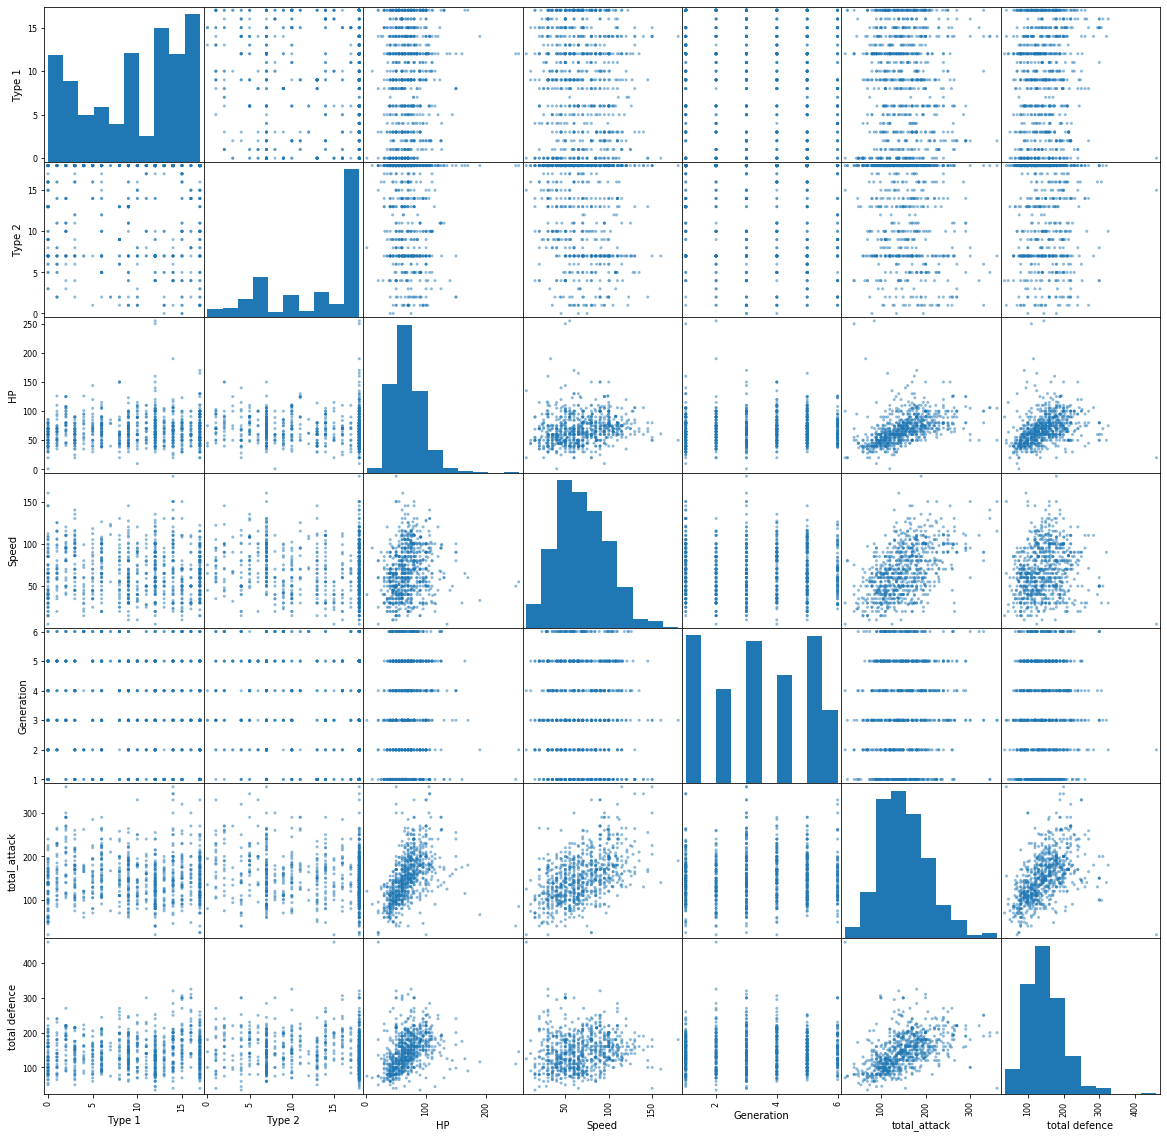

In [360]:
pd.plotting.scatter_matrix(pokemon, figsize = (20,20))

In [362]:
scale = ppr.RobustScaler()
columns = pokemon.columns
scaled_pokemon = pd.DataFrame(scale.fit_transform( pokemon), columns = columns )

In [383]:
scaled_pokemon.head()

,Type 1,Type 2,HP,Speed,Generation,total_attack,total defence
0,-0.111111,-0.318182,-0.666667,-0.444444,-0.666667,-0.462633,-0.370107
1,-0.111111,-0.318182,-0.166667,-0.111111,-0.666667,-0.064057,0.042705
2,-0.111111,-0.318182,0.500000,0.333333,-0.666667,0.505338,0.612100
3,-0.111111,-0.318182,0.500000,0.333333,-0.666667,1.074733,1.466192
4,-0.444444,0.136364,-0.866667,0.000000,-0.666667,-0.491103,-0.669039


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcf44860b8>,
      dtype=object)

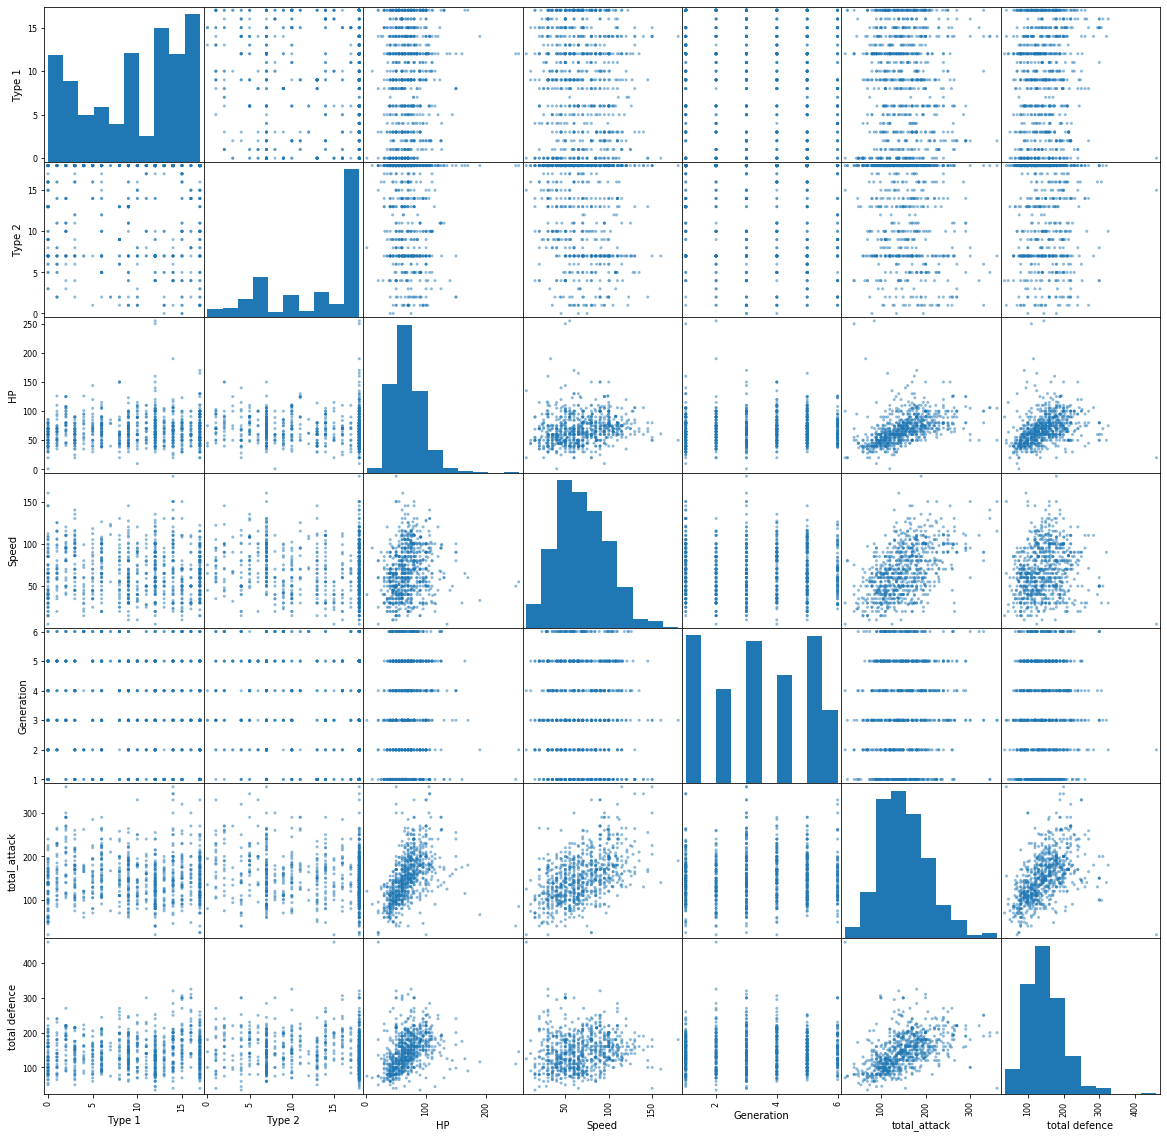

In [364]:
pd.plotting.scatter_matrix(pokemon, figsize = (20,20))

In [365]:
from sklearn.model_selection import StratifiedShuffleSplit as sss

In [366]:
scaled_pokemon.__len__()

800

In [381]:
k = sss( n_splits = 1 , test_size = 0.2, train_size = 0.8 )

train_idx , test_idx = list(tuple(k.split( scaled_pokemon,label))[0][0]),list(tuple(k.split( scaled_pokemon,label))[0][1])

In [384]:
pokemon_tensor = torch.utils.data.TensorDataset( torch.tensor( np.array(scaled_pokemon) ), torch.tensor(np.array(label)))

In [927]:
def split_data( datasets, train_idx, test_idx, samplers = torch.utils.data.SubsetRandomSampler , batchsize = 200 ):
    
    test_smp, train_smp = samplers(test_idx),samplers(train_idx)
    
    # returns  train_loader, valid_loader, test_loader 
    
    train_loader,  test_loader = dataloader(datasets, sampler = train_smp, batch_size = batchsize ),dataloader(datasets, sampler = test_smp,batch_size = batchsize )
    return  train_loader, test_loader 

In [928]:
train_loader, test_loader = split_data( pokemon_tensor, train_idx, test_idx)

In [457]:
from torch import nn

class work( nn.Module ):
    
    def __init__( self, lr_  ):
        
        super().__init__()
        self.model = nn.Sequential( nn.Linear( 7, 6),
                             nn.Tanh(),
                                   nn.Linear(  6,2),
                             nn.Softmax()  )
        self.lr = lr_
        self.optimizer =  torch.optim.Adam( self.model.parameters(), lr = self.lr )

        self.criterion = nn.CrossEntropyLoss()
        
    def forward(self,data):
        pass
       
    def train( self, train_loader, epochs):
        losses = []
        correct0 = 0
        for epoch in range(epochs):
            self.optimizer =  torch.optim.Adam( self.model.parameters(), lr = self.lr)
            for train_data, labels in train_loader:
                self.optimizer.zero_grad()

                out = self.model( train_data.float() )
                
                target = labels.max(1)[1]
                loss = self.criterion( out, target)
                
                
                loss.backward()
                self.optimizer.step()
                losses.append( loss.item() )
            
        return losses
                    
    def predict( self,dataloader ):
        correct = 0
        total = 0
        wrong = {}
        with torch.no_grad():
            for data, labels in dataloader:
                
                _, out = torch.max( self.model( data.float()), dim = 1)
                _,label = torch.max( labels, dim =1 )
                x = out.eq( label )
                correct += x.sum()
                
                for i in range(len(x)):
                    if x[i]== 0:
                        wrong[(label[i]) = data[i]
                total += len( label)
                
            return correct,total, wrong

        


SyntaxError: invalid syntax (<ipython-input-457-57c13f950b30>, line 54)

(160, tensor(157))

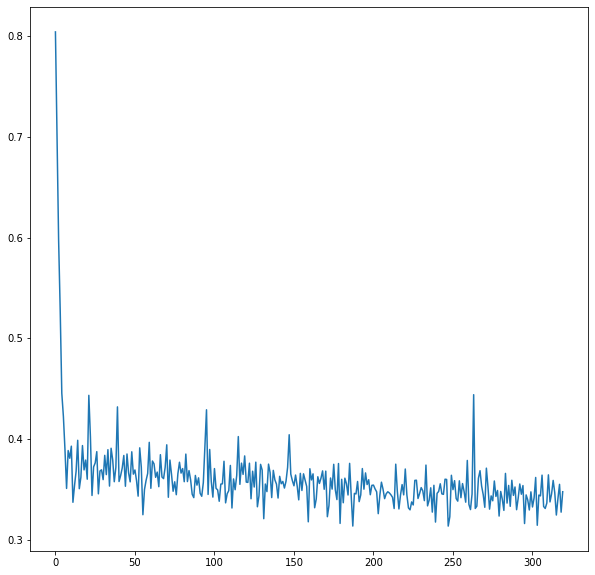

In [932]:
a = work( 0.1 )
plt.figure(figsize = (10,10))
plt.plot(a.train( train_loader, 80))
prediction = a.predict( test_loader)
prediction[1],prediction[0]

In [933]:
correct_results = prediction[0]
total = prediction[1]
wrong_ones = prediction[2]
test_accuracy = (float(correct_results)/float(total))*100
print(test_accuracy)

98.125


In [936]:
(float(a.predict(train_loader)[0])*100/float(a.predict(train_loader)[1]))

97.8125

In [845]:
pd.DataFrame(wrong_ones).transpose()

,0,1,2,3,4,5,6
tensor(1),0.555556,0.136364,0.500000,-0.333333,0.000000,0.049822,2.277580
tensor(0),-0.888889,-0.863636,1.000000,1.222222,0.000000,1.686833,1.138790
tensor(1),-0.444444,-0.863636,0.833333,0.555556,-0.666667,1.117438,0.498221


##  test accuracy  - 98.125%
## train accuracy - 97.8125%